In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [38]:


def tts_scale(x, y, scaler, encoding=None, test_size=None, random_state=None):
    '''
    Helper function to correctly train-test-split, scale numerical columns, and one-hot-encode categorical features.
    Will return x_train, x_test, y_train, y_test.
    
    Parameters:
    x         ==> input variables from dataframe.
    y         ==> target variable from dataframe.
    encoding  ==> iterable of columns from dataframe to be one-hot-encoded.
    ts        ==> test size from train-test-split.
    rs        ==> random_state for train_test_split function.
    scaler    ==> scaling object used to scale numeric data for x_train and x_test.
    
    '''
    
    if(type(x) != type(pd.DataFrame()) and type(x) != type(pd.Series())):
        raise TypeError('X must be a Pandas DataFrame or Pandas Series.')

    if(type(y) != type(pd.DataFrame()) and type(y) != type(pd.Series())):
        raise TypeError('X must be a Pandas DataFrame or Pandas Series.')
    

    num_cols = x.corr().columns
    cat_cols = []
    
    for col in x.columns:
        if col not in num_cols:
            cat_cols.append(col)
    

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    

    
    try:
        x_train_s = pd.DataFrame(scaler.fit_transform(x_train[num_cols]), columns=num_cols)
        x_test_s = pd.DataFrame(scaler.fit_transform(x_test[num_cols]), columns=num_cols)

        x_train_s = x_train_s.set_index(x_train.index)
        x_test_s = x_test_s.set_index(x_test.index)
    except AttributeError:
        raise TypeError('The type of this scaler is not allowed.')

    if encoding is not None:
        
        x_train_cat = pd.get_dummies(x_train[cat_cols],columns=encoding)
        x_test_cat = pd.get_dummies(x_test[cat_cols],columns=encoding)
        x_train_final = pd.merge(x_train_s, x_train_cat, left_index=True, right_index=True)
        x_test_final = pd.merge(x_test_s, x_test_cat, left_index=True, right_index=True)
        
        return x_train_final, x_test_final, y_train, y_test

    else:

        return x_train_s, x_test_s, y_train, y_test
    

In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns',45)

In [41]:
df = pd.read_csv(r'final.csv',index_col=0)
df = df[df['Credit Risk Code'].notna()]
df['Credit Risk Code'] = df['Credit Risk Code'].astype(str)


df.head()

,PK,Date,Qdate,Balance,Days Past Due,Past_Due30_59,Past_Due60_89,Past_Due90+,Credit Risk Code,Adversity,QTR_CLOSE,REAL_GDP_GROWTH,NOMINAL_GDP_GROWTH,REAL_DISPOSABLE_INCOME_GROWTH,NOMINAL_DISPOSABLE_INCOME_GROWTH,UNEMPLOYMENT_RATE,CPI_INFLATION_RATE,THREE_MONTH_TREASURY_RATE,FIVE_YEAR_TREASURY_YIELD,TEN_YEAR_TREASURY_YIELD,BBB_CORPORATE_YEILD,MORTGAGE_RATE,PRIME_RATE,DOWJONES_TOTAL_STOCK_MARKET_INDEX,HOUSE_PRICE_INDEX,COMERCIAL_REAL_ESTATE_PRICE_INDEX,MARKET_VOLATILITY_INDEX,EURO_AREA_REAL_GDP_GROWTH,EURO_AREA_INFLATION,EURO_AREA_BILATERAL_DOLLAR_EXCHANGE_RATE,DEVELOPING_ASIA_REAL_GDP_GROWTH,DEVELOPING_ASIA_INFLATION,DEV_ASIA_BILATERAL_DOLLAR_EXCHANGE_RATE,JAPAN_REAL_GDP_GROWTH,JAPAN_INFLATION,JAPAN_BILATERAL_DOLLAR_EXCHANGE_RATE,UK_REAL_GDP_GROWTH,UK_INFLATION,UK_BILATERAL_DOLLAR_EXCHANGE_RATE,Default
0,2,2015-01-31,Q1 2015,7685.03,15,10,5,1,5.0,Historical,2015-03-01,3.2,3.0,4.6,2.8,5.5,-2.6,0.0,1.5,2.0,3.9,3.7,3.3,21708,168,241,22.4,3.0,-0.7,1.074,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,1.0
1,3,2015-01-31,Q1 2015,181479.00,0,0,0,0,3.0,Historical,2015-03-01,3.2,3.0,4.6,2.8,5.5,-2.6,0.0,1.5,2.0,3.9,3.7,3.3,21708,168,241,22.4,3.0,-0.7,1.074,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0
2,4,2015-01-31,Q1 2015,67382.89,0,0,0,0,3.0,Historical,2015-03-01,3.2,3.0,4.6,2.8,5.5,-2.6,0.0,1.5,2.0,3.9,3.7,3.3,21708,168,241,22.4,3.0,-0.7,1.074,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0
3,5,2015-01-31,Q1 2015,115580.00,0,0,0,0,1.0,Historical,2015-03-01,3.2,3.0,4.6,2.8,5.5,-2.6,0.0,1.5,2.0,3.9,3.7,3.3,21708,168,241,22.4,3.0,-0.7,1.074,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0
4,6,2015-01-31,Q1 2015,111445.00,0,0,0,0,1.0,Historical,2015-03-01,3.2,3.0,4.6,2.8,5.5,-2.6,0.0,1.5,2.0,3.9,3.7,3.3,21708,168,241,22.4,3.0,-0.7,1.074,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0


In [42]:
X = df.drop(columns=['PK','Default'])
Y = df['Default']

In [43]:
x_train, x_test, y_train, y_test = tts_scale(X, Y, StandardScaler(), encoding=['Credit Risk Code'], test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


## Logistic Regression

In [44]:
x_train = x_train.drop(columns=['Adversity','QTR_CLOSE','Qdate','Past_Due90+']) #have to drop pastdue90+ - getting 100%
x_test = x_test.drop(columns=['Adversity','QTR_CLOSE','Qdate','Past_Due90+'])

In [45]:
x_train = x_train.set_index(['Date'])
x_test = x_test.set_index(['Date'])

In [46]:
X = pd.concat([x_train,x_test])

In [47]:
x_train

,Balance,Days Past Due,Past_Due30_59,Past_Due60_89,REAL_GDP_GROWTH,NOMINAL_GDP_GROWTH,REAL_DISPOSABLE_INCOME_GROWTH,NOMINAL_DISPOSABLE_INCOME_GROWTH,UNEMPLOYMENT_RATE,CPI_INFLATION_RATE,THREE_MONTH_TREASURY_RATE,FIVE_YEAR_TREASURY_YIELD,TEN_YEAR_TREASURY_YIELD,BBB_CORPORATE_YEILD,MORTGAGE_RATE,PRIME_RATE,DOWJONES_TOTAL_STOCK_MARKET_INDEX,HOUSE_PRICE_INDEX,COMERCIAL_REAL_ESTATE_PRICE_INDEX,MARKET_VOLATILITY_INDEX,EURO_AREA_REAL_GDP_GROWTH,EURO_AREA_INFLATION,EURO_AREA_BILATERAL_DOLLAR_EXCHANGE_RATE,DEVELOPING_ASIA_REAL_GDP_GROWTH,DEVELOPING_ASIA_INFLATION,DEV_ASIA_BILATERAL_DOLLAR_EXCHANGE_RATE,JAPAN_REAL_GDP_GROWTH,JAPAN_INFLATION,JAPAN_BILATERAL_DOLLAR_EXCHANGE_RATE,UK_REAL_GDP_GROWTH,UK_INFLATION,UK_BILATERAL_DOLLAR_EXCHANGE_RATE,Credit Risk Code_1.0,Credit Risk Code_10.0,Credit Risk Code_2.0,Credit Risk Code_3.0,Credit Risk Code_4.0,Credit Risk Code_4.5,Credit Risk Code_5.0,Credit Risk Code_6.0,Credit Risk Code_6.5,Credit Risk Code_7.0,Credit Risk Code_8.0,Credit Risk Code_9.0
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-29,-0.240537,-0.254243,-0.290890,-0.214424,-2.379744,-2.381616,2.430617,2.425362,2.392994,-1.886045,-0.909518,-1.712472,-1.833561,-1.053819,-1.422821,-0.958111,1.455027,1.214216,1.119433,0.916145,-2.260907,-1.519261,0.087316,1.779190,-1.974306,0.534622,-2.386382,-1.346750,-0.612719,-2.404738,-1.645624,-0.904967,0,0,0,1,0,0,0,0,0,0,0,0
2017-03-31,-0.233311,-0.250165,-0.290890,-0.214424,0.495977,0.511249,-0.279813,-0.202729,-0.346947,0.926229,-0.260023,0.675372,0.875134,0.354828,1.022311,-0.269205,-0.371870,-0.490504,-0.729651,-1.010748,0.598979,1.606598,-1.366655,0.029705,-0.245555,0.027271,0.758873,-0.462674,0.038408,0.507655,1.752262,-0.739800,0,0,0,1,0,0,0,0,0,0,0,0
2020-01-31,-0.236968,1.749701,0.169723,0.688418,-0.121458,-0.075038,-0.427889,-0.428195,-0.607894,0.212001,0.389471,-0.518550,-0.780180,-1.053819,-0.689282,0.557483,0.009842,1.037865,1.080910,2.037247,-0.538166,0.081789,-0.505043,-1.984091,0.939875,1.645963,0.095195,0.126711,-0.666979,0.001152,0.598263,-0.827241,0,0,0,0,0,0,0,1,0,0,0,0
2016-08-31,0.700215,-0.254243,-0.290890,-0.214424,0.487519,0.472678,-0.479393,-0.456379,-0.249092,0.524475,-0.649720,-0.518550,-0.479214,-0.819044,-0.933795,-0.682549,-0.898825,-0.784422,-0.729651,-0.791783,0.544505,0.462991,0.087316,0.035998,-0.393733,-0.335123,0.422225,-0.659135,-1.806451,0.484206,0.662374,-0.273445,0,0,0,0,0,0,1,0,0,0,0,0
2020-03-31,-0.239658,-0.254243,2.779862,2.945523,-0.121458,-0.075038,-0.427889,-0.428195,-0.607894,0.212001,0.389471,-0.518550,-0.780180,-1.053819,-0.689282,0.557483,0.009842,1.037865,1.080910,2.037247,-0.538166,0.081789,-0.505043,-1.984091,0.939875,1.645963,0.095195,0.126711,-0.666979,0.001152,0.598263,-0.827241,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-30,-0.229986,-0.254243,-0.290890,-0.214424,0.487519,0.457249,-0.421450,-0.449333,-0.412184,-0.145114,0.129673,0.376891,0.574168,-0.114721,0.533285,0.006358,-0.212414,-0.314154,-0.421470,-0.883749,0.619407,-0.146932,0.545047,0.035998,0.001410,-0.069367,0.470317,0.126711,0.219277,0.446687,1.303484,-0.292876,1,0,0,0,0,0,0,0,0,0,0,0
2019-10-31,0.855567,-0.254243,-0.290890,-0.214424,0.470603,0.495820,-0.460079,-0.385921,-0.705749,0.836950,1.038965,0.078411,-0.178248,-1.288593,-0.200255,1.108608,1.831829,0.979082,1.543181,-0.682301,0.496840,0.386751,0.060390,-0.026933,2.569841,0.703739,0.393369,0.421403,-0.449937,0.451377,-0.555736,-0.030552,0,0,0,0,1,0,0,0,0,0,0,0
2018-05-31,-0.111788,-0.254243,-0.290890,-0.214424,0.597473,0.734964,-0.421450,-0.357737,-0.575275,0.613754,1.298763,1.869294,1.477066,1.528701,1.755851,1.108608,0.611744,0.391247,0.464549,-0.550921,0.517268,1.149156,1.272032,0.023412,-0.294947,-0.383442,0.518410,-1.936134,-0.088200,0.498275,0.534152,-0.098562,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
#BEWARE takes 5 minutes to run
'''log_reg = LogisticRegression(random_state=42,solver='lbfgs',max_iter=10000)

params={'C': [15,20,25,30]}

clf = GridSearchCV(log_reg,params,cv=5,verbose = 1, scoring = 'accuracy')

clf.fit(x_train, y_train)

DF=pd.DataFrame(clf.cv_results_)
DFF=DF[["param_C","mean_test_score","rank_test_score"]]
DFF #did not converge with 500 iterations. 10k iterations- best value: 15
'''

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.5min finished


,param_C,mean_test_score,rank_test_score
0,15,0.961319,1
1,20,0.961309,3
2,25,0.961298,4
3,30,0.961314,2


In [50]:
#Run model with Best C value found above, C=20
log_reg = LogisticRegression( C=15,random_state=42,solver='lbfgs')
log_reg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=15, random_state=42)

In [51]:
predictions = log_reg.predict(x_test)

In [52]:
sc=log_reg.score(x_test, y_test)
print("The model's mean accuracy score on the test set it", sc)

The model's mean accuracy score on the test set it 0.9612895101372623


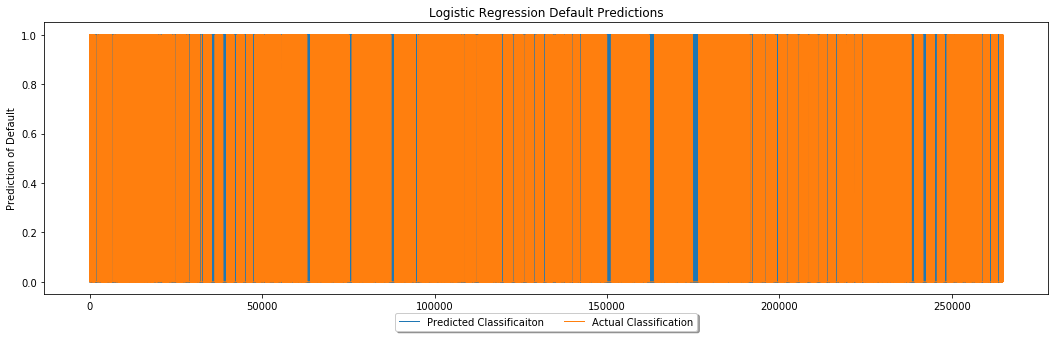

In [57]:
y_pred=np.around(log_reg.predict_proba(X))
y_pred=y_pred[:,1]
plt.figure(figsize=(18,5))
plt.plot(y_pred,linewidth=1, label='Predicted Classificaiton')
plt.plot(Y,linewidth=1, label='Actual Classification')

plt.title('Logistic Regression Default Predictions')
plt.ylabel('Prediction of Default')
plt.xlabel('Observations')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

#blue line- true classification
#orange line prediction, so where you see the blue misclassificaiton 

In [58]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[72252  1094]
 [ 1980  4084]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     73346
         1.0       0.79      0.67      0.73      6064

    accuracy                           0.96     79410
   macro avg       0.88      0.83      0.85     79410
weighted avg       0.96      0.96      0.96     79410

